## Drill: Unit1 Intermediate Visualization

### Drills
Find a dataset you'd like to explore. This can be something you're familiar with or something new. Create a Jupyter notebook and then:

- Choose one variable and plot that variable four different ways.
- Choose two continuous variables, and plot them three different ways.
- Choose one continuous variable and one categorical variable, and plot them six different ways.

Give the pros and cons of each plot you create. You can use variables from multiple datasets if you like.



# Drills

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
exercise = sns.load_dataset("exercise")
titanic = sns.load_dataset("titanic")
iris = sns.load_dataset("iris")
tips = sns.load_dataset("tips")
planets = sns.load_dataset("planets")

### Choose one variable and plot that variable four different ways.

1. barplot
2. pointplot
3. boxplot
4. violin plot

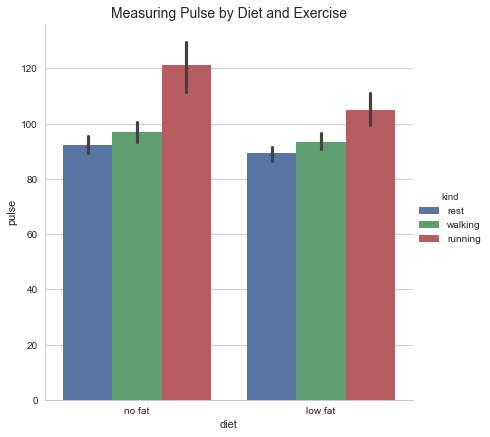

In [3]:
sns.set(style="whitegrid")
x = "diet"
y = "pulse"
hue = "kind"
data = exercise

g = sns.factorplot(x, y, hue, data, size=6, kind="bar", ci=95)
plt.title("Measuring Pulse by Diet and Exercise", fontsize=14)
plt.show()

**Bar plot**

The barplot plots the mean of the pulse in resting position, while walking and while running, categorized by no fat diet and low fat diet. 

**Pros:** clear visualization of pulse rates in three kinds of exercise

**Cons:** The highest pulse rate is achieved in running while on no fat diet. This is also the with the largest error bar showing maximum variance.
- bars take up too much space


Text(0.5,1,'Measuring Pulse by Diet and Exercise kind')

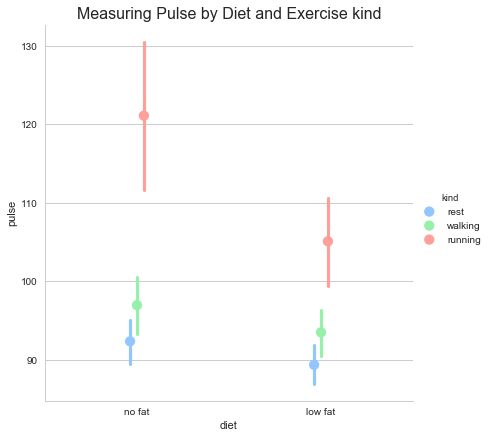

In [4]:
g = sns.factorplot(x, y, hue, data, size=6, kind="point", 
                   palette="pastel", ci=95, dodge=True, join=False)
plt.title("Measuring Pulse by Diet and Exercise kind", fontsize=16, loc="center")

**Point plot**

**Pros:** 
- range of variance is easily visualized with the error bars
- takes up less space than bar plot
- the differences in the mean (shown by the dots) are more informative for visually comparing the differences. For example, the difference of the pulse rates in the no fat and low fat diets for running are much explicit in the point plot. 

**Cons:** 
- Doesn't have to start from zero, and therefore the actual differences seem more drastic. This information could be used to show relations between the categories. 


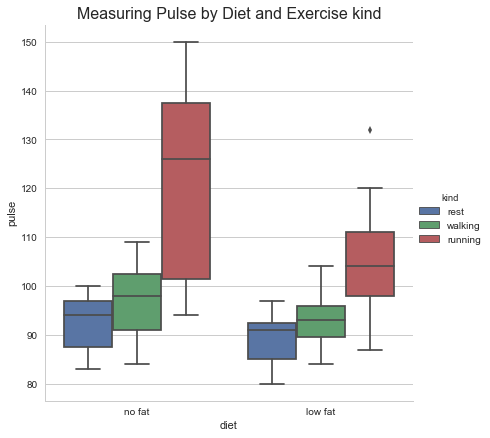

In [5]:
sns.set(style="whitegrid")
x = "diet"
y = "pulse"
hue = "kind"
data = exercise

g = sns.factorplot(x, y, hue, data, kind="box", size=6)

plt.title('Measuring Pulse by Diet and Exercise kind',
         fontsize=16)
plt.show()

**Box Plot**

Box plots provide more information that the barplots or the point plots. The whiskers show the minimum and the maximum values. The box is demarcated by the first quartile and the third quartile (the interquartile range) along with the median as the line in the middle. 

**Pros:** 
- shows a greater range of information
- better outlier detection, ±3IQR is considered outliers and are represented by dots in the plot. Suspected outliers have values ±1.5IQR.

**Cons:**
- The rectangular boxes doesn't show the distribution of actual values



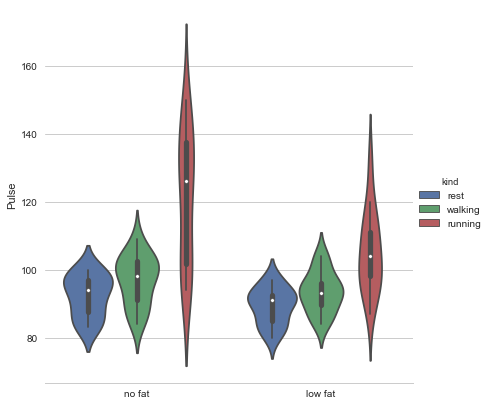

In [6]:
g = sns.factorplot(x, y, hue, data, size=6, kind="violin")

(g.despine(left=True)
    .set_ylabels("Pulse")
    .set_xlabels(""))


**Violin Plot**

Violin plots are similar to boxplots except it shows the distribution of values. The box and the whiskers are shown within the violin plots. 

**Pros:** 
- uses kernel density estimation, a non-parametric approach of probability density estimation that has been proven to be more useful for smoothing


**Cons:**
- Needs tweaking as kde is involved. 


### Choose two continuous variables, and plot them three different ways.

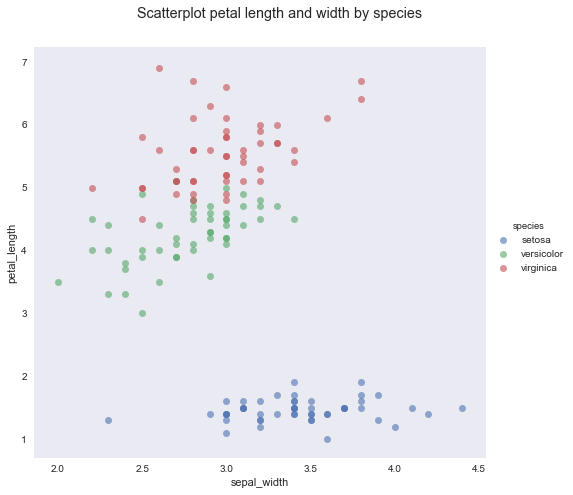

In [7]:
sns.set(style="dark")

x='petal_width'
y='petal_length'
 
g = sns.lmplot("sepal_width","petal_length", hue='species',
               size=7,
               aspect=1,
               data=iris, # Data.
               #col='species',
               fit_reg=False,
               ci=False,
               scatter_kws={'alpha':0.6}
              )

plt.suptitle('Scatterplot petal length and width by species')
plt.subplots_adjust(top=0.9)
plt.show()


In [8]:
#tried the following jointplot for the scatterplot but it doesn't show distribution by color as above
#g = sns.jointplot(y, x, color='g', data=iris, 
#                  marginal_kws=dict(bins=15, rug=True),
#                  annot_kws=dict(stat="r"),
#                  s=40, edgecolor="w", 
#                  linewidth=1)
#plt.suptitle('Scatterplot petal length and width by species')
#plt.show()




**Scatterplot **

Two continuous variables for showing correlations. This scatterplot is derived through lmplot. I chose this over the jointplot because this shows the three species in differnt colots. As part of lmplot, a linear model could be fit, and it represented by a line of fit. 

lmplots are similar to facetgrid, such that it makes data segregation easy. In the plot above, the subplots are divided in terms of species and each plot represents the correlation between the petal length and sepal width. 

It shows that setosa, the smallest iris, has the smallest petal length, and yet the largest sepal width. Virginica and Vesricolor on the other hand, has larger petal length and smaller sepal width. 


**Pros:**

- Color coding makes the visualization much more effective.  

**Cons:**
- Not sure

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


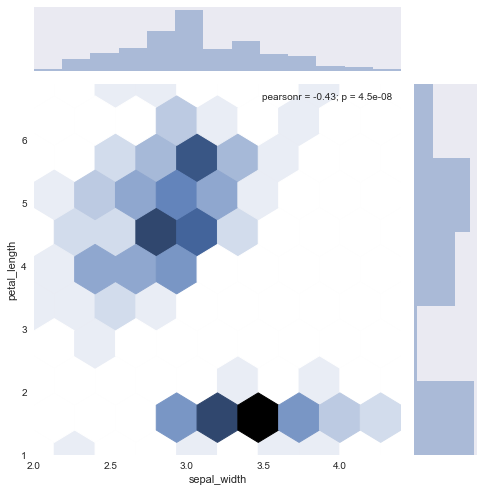

In [9]:
sns.jointplot("sepal_width","petal_length",data=iris, kind='hex', size=7)



**Hexbinplots **

Hexbinplots (hexagonal binning) is "a form of bivarialte histogram useful for visualizing the structure in datasets with large n" ([Lewin-Koh 2018](https://cran.r-project.org/web/packages/hexbin/vignettes/hexagon_binning.pdf)) Hexagons are more useful than squares as they have the symmetry of the nearest neighbor and is 13% more efficient than squares for covering the plane. These are alos visually less biased in displaying densities. The color ramp is proportionate with density; the higher the density, the deeper the color. 

In this plot, we see that there are three higher densities of petal length and sepal width. In accordance with the scatterplot we know that these are categorized by the three species.  

**Pros:**

- great way of showing densities between the two independent variables. 

**Cons:**
- Not appealing for small n, as in this dataset. 

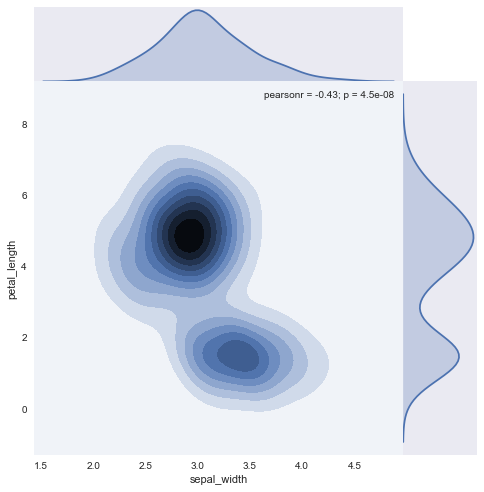

In [10]:
sns.jointplot("sepal_width","petal_length",data=iris, 
              kind='kde', space=0, size=7)




**kdeplots **

kdeplots show the density by estimating the kernel density. It could be a little misleading at least in the current plot as the distribution of density of three specieses is lost here. 

**Pros :**

- great way of showing densities between the two independent variables. 

**Cons:**
- Not appealing for small n, as in this dataset. 

### Choose one continuous variable and one categorical variable, and plot them six different ways.

In [11]:
print(titanic.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


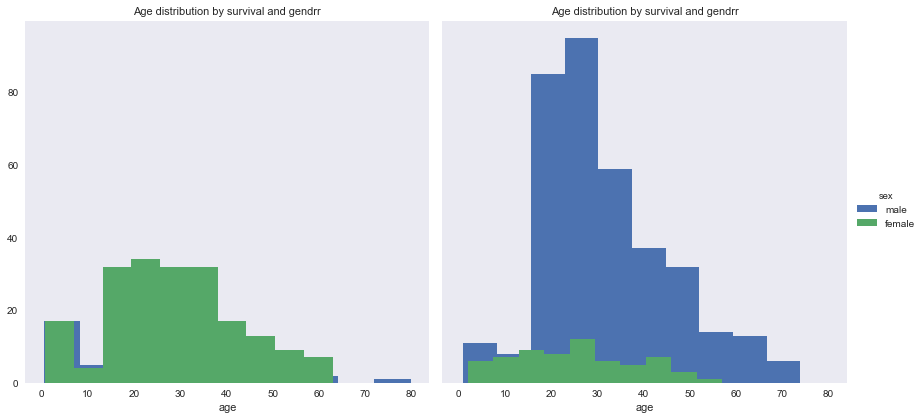

In [12]:
g = sns.FacetGrid(titanic, col="survived", col_order=[1,0], hue='sex', 
                  hue_order=["male", "female"], size=6, aspect=1)
g.map(plt.hist, "age", data=titanic)
(g.add_legend()
    .set_axis_labels())
g.set_titles("Age distribution by survival and gendrr")

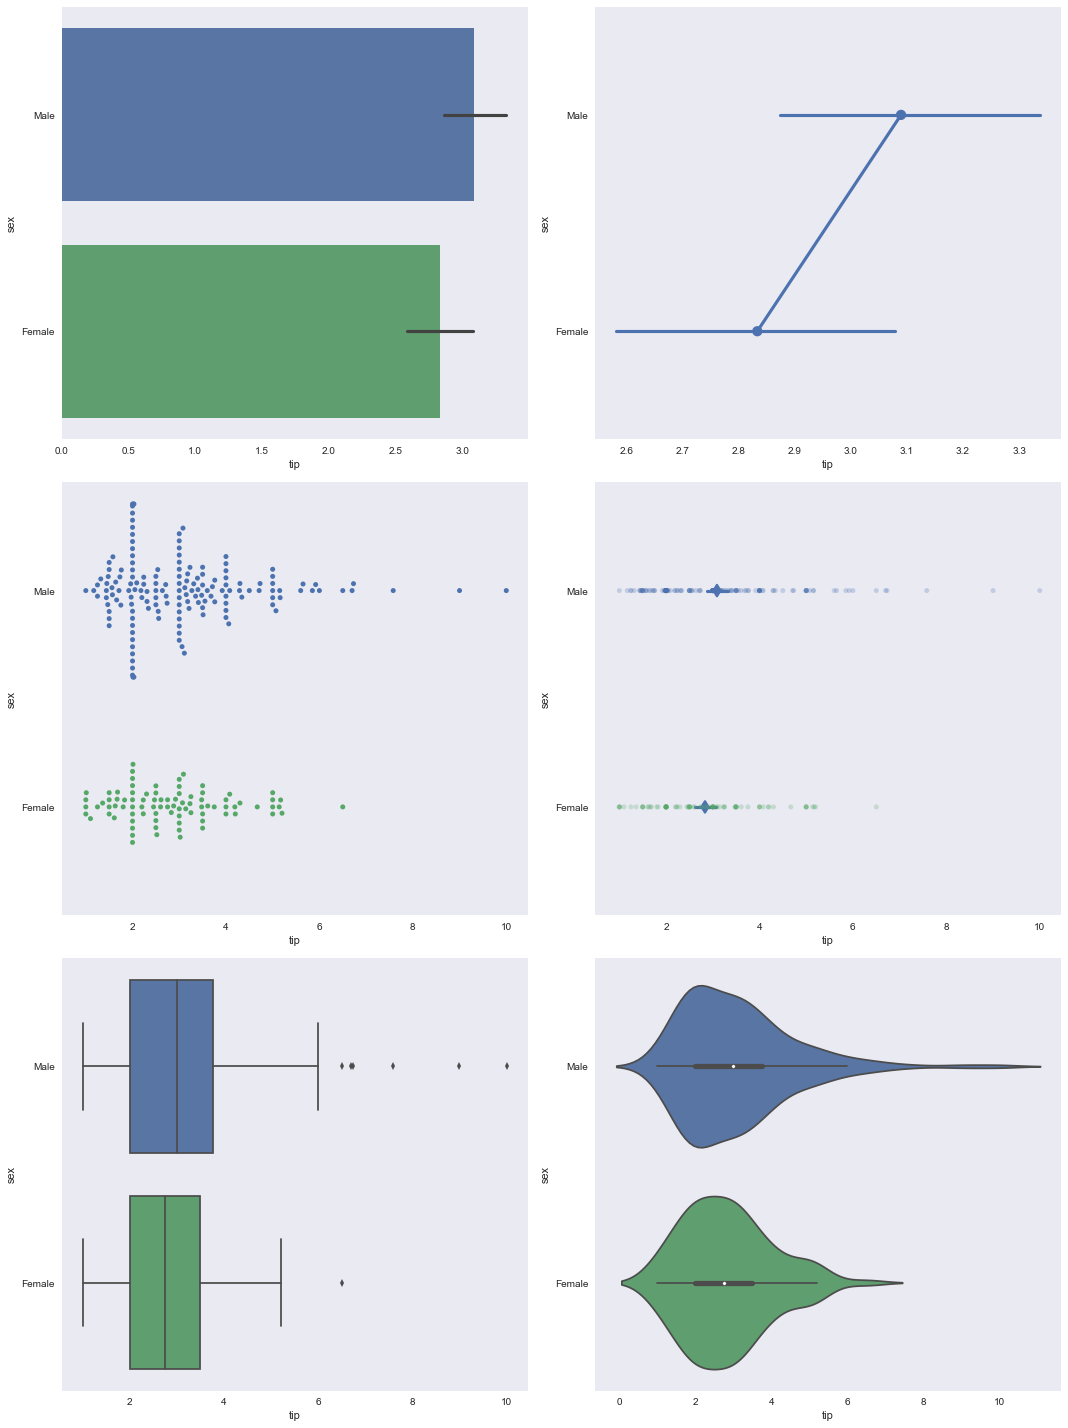

In [13]:
plt.figure(figsize=(15,20))

y = "tip"
x = "sex"
data = tips

# Barplot
plt.subplot(3,2,1)
sns.barplot(y, x, data=tips);

# Pointplot
plt.subplot(3,2,2)
sns.pointplot(y, x, data=tips);

# Swarmplot
plt.subplot(3,2,3)
sns.swarmplot(y, x, data=tips);

# Stripplot
plt.subplot(3,2,4)
sns.stripplot(y, x, data=tips, alpha=.25)
sns.pointplot(y, x, data=tips, dodge=.532, join=False, markers="d")

# Boxplot
plt.subplot(3,2,5)
sns.boxplot(y, x, data=tips);

# Violin plot
plt.subplot(3,2,6)
sns.violinplot(y, x, data=tips);

plt.tight_layout()

### Challenge

As an optional challenge, find a dataset with at least four continuous variables and one categorical variable. Create one master plot that gives insight into the variables and their interrelationships, including:

- Probability distributions
- Bivariate relationships
- Whether the distributions or the relationships vary across groups

Accompany your plot with a written description of what you see.


In [14]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


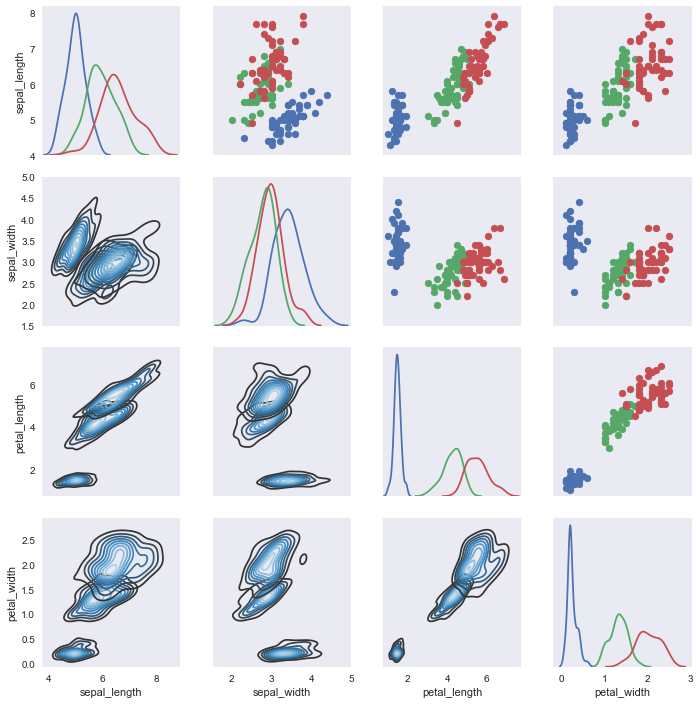

In [38]:
# Paired Density and Scatter Plots (for all categorical variables)
g = sns.PairGrid(iris, diag_sharey=False, hue="species")

g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot)
g.map_lower(sns.kdeplot,  cmap="Blues_d")

plt.show()